In [1]:
import PyPDF2

def split_pdf_by_chapters(input_file, output_prefix):
    # Open the PDF file in read-binary mode
    i = 0
    chapter_page = {
        'text':[],
        'page':[],
        'prev_page':[],
        'diff':[]
    }
    prev_page = 0
    with open(input_file, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)

        # Iterate over each page of the PDF
        for page_number in range(len(pdf_reader.pages)):
            # Extract the text from the current page
            page = pdf_reader.pages[page_number]
            text = page.extract_text()

            # Check if the current page indicates the start of a chapter
            if is_chapter_start(text):
                # Create a new PDF writer object for the chapter
#                 pdf_writer = PyPDF2.PdfFileWriter()
                # Add the current page to the chapter
#                 pdf_writer.addPage(page)

#                 # Iterate over the subsequent pages until the next chapter starts
#                 while page_number + 1 < len(pdf_reader.pages):
#                     next_page_number = page_number + 1
#                     next_page = pdf_reader.getPage(next_page_number)
#                     next_text = next_page.extract_text()

#                     if is_chapter_start(next_text):
#                         break

#                     # Add the next page to the chapter
#                     pdf_writer.addPage(next_page)
#                     page_number = next_page_number
                chapter_page['page'].append(page_number)
                chapter_page['prev_page'].append(prev_page)
                chapter_page['diff'].append(abs(prev_page-page_number))
                chapter_page['text'].append(text)            

                prev_page = page_number


    return chapter_page

import re

def is_chapter_start(text):
    # Define a list of keywords that may indicate a chapter start
    keywords = ['chapter', 'section', 'part', 'prologue', 'epilogue']

    # Define a list of patterns to match chapter titles or headings
    patterns = [
        r'^\s*Chapter\s+\d+',                      # Matches "Chapter" followed by digits
        r'^\s*Section\s+\d+',                      # Matches "Section" followed by digits
        r'^\s*Part\s+\d+',                         # Matches "Part" followed by digits
#         r'^\s*([IVX]+|[ivx]+)\.\s',                # Matches Roman numerals followed by a dot and space
#         r'^\s*(\d+)\.\s',                          # Matches digits followed by a dot and space
#         r'^\s*(\d+)\s*[-–]\s*(\d+)',                # Matches a range of digits separated by a hyphen or en dash
#         r'^\s*[\d.]+\s',                           # Matches a single numeric value followed by space
#         r'^\s*[\d.]+\.\s'                          # Matches a single numeric value followed by dot and space
    ]

    # Convert the text to lowercase for case-insensitive matching
    lowercase_text = text.lower()

    # Check if any of the patterns match the text
    for pattern in patterns:
        match = re.search(pattern, lowercase_text, re.IGNORECASE)
        if match:
            return True
    
    # Check if any of the keywords appear in the text
    for keyword in keywords:
        if keyword.lower() in lowercase_text:
            return True
    
    return False


# Usage
input_file = './Learning_Python.pdf'
output_prefix = 'chapter'
chapter_page = split_pdf_by_chapters(input_file, output_prefix)


In [3]:
len(chapter_page)

4

In [4]:
import matplotlib.pyplot as plt

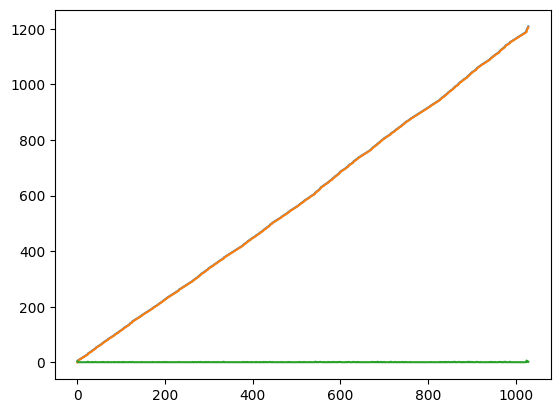

In [5]:
plt.plot(chapter_page['page'])
plt.plot(chapter_page['prev_page'])
plt.plot(chapter_page['diff'])

In [9]:
for i in range(len(chapter_page['diff'])):
#     pint(chapter_page['diff'])
        if chapter_page['diff'][i] > 1:
            print('\n\n'*4)
            print(chapter_page['page'][i])
            print(chapter_page['text'][i])












4
Learning Python, Fourth Edition
by Mark Lutz
Copyright © 2009 Mark Lutz. All rights reserved.
Printed in the United States of America.
Published by O’Reilly Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA 95472.
O’Reilly books may 
be purchased for educational, business, or sales promotional use. Online editions
are also available for most titles ( http://my.safaribooksonline.com). For more information, contact our
corporate/institutional sales department: (800) 998-9938 or corporate@oreilly.com.
Editor: Julie Steele
Production Editor: Sumita Mukherji
Copyeditor: Rachel Head
Production Services: Newgen North AmericaIndexer: John Bickelhaupt
Cover Designer: Karen Montgomery
Interior Designer: David Futato
Illustrator: Robert Romano
Printing History:
March 1999: First Edition. 
December 2003: Second Edition. 
October 2007:
Third Edition. 
September 2009: Fourth Edition. 
Nutshell Handbook, the Nutshell Handbook logo, and the O’Reilly logo are registered trademarks 